# Detecting Trolls

In [6]:
import pandas as pd
import numpy as np

In [7]:
df_fake_followers = pd.read_csv("data_mib/fake_followers.csv/fake_followers.csv/users.csv")
df_fake_followers.fillna(0, inplace=True)
# df_fake_followers.head(3)

In [8]:
def viz_df(df):
    for col in df.columns:
        print("column : {}".format(col))
        print(df[col].describe())
        print()
        print(df[col].value_counts()[:4])
        print()
        print("-------------")

In [9]:
df_genuine_followers = pd.read_csv("data_mib/genuine_accounts.csv/users.csv")
df_genuine_followers.fillna(0, inplace=True)
# df_genuine_followers.head(3)

In [10]:
useful_columns = ["statuses_count", "followers_count", "friends_count", "favourites_count", "listed_count", "default_profile", "profile_banner_url", "profile_background_tile", "profile_background_color" ,"verified"]

In [11]:
df_fake_followers = df_fake_followers[useful_columns]
df_genuine_followers = df_genuine_followers[useful_columns]

In [12]:
df_fake_followers.head(3)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_banner_url,profile_background_tile,profile_background_color,verified
0,29,19,255,1,0,0.0,0,1.0,131516,0.0
1,1408,208,866,138,0,0.0,https://si0.twimg.com/profile_banners/82487179...,0.0,709397,0.0
2,39,59,962,8,0,0.0,0,0.0,022330,0.0


In [13]:
viz_df(df_fake_followers)

column : statuses_count
count     3351.000000
mean        71.898239
std        634.979715
min          0.000000
25%         16.000000
50%         23.000000
75%         39.000000
max      33128.000000
Name: statuses_count, dtype: float64

20    159
0     138
19    130
18    128
Name: statuses_count, dtype: int64

-------------
column : followers_count
count    3351.000000
mean       17.740376
std        54.223193
min         0.000000
25%         8.000000
50%        12.000000
75%        18.000000
max      1624.000000
Name: followers_count, dtype: float64

8     201
13    183
12    182
9     176
Name: followers_count, dtype: int64

-------------
column : friends_count
count    3351.000000
mean      370.059684
std       212.552488
min         0.000000
25%       217.000000
50%       305.000000
75%       529.000000
max      2004.000000
Name: friends_count, dtype: float64

205    29
211    27
218    26
206    23
Name: friends_count, dtype: int64

-------------
column : favourites_count
count 

In [14]:
viz_df(df_genuine_followers)

column : statuses_count
count      3474.000000
mean      16958.220207
std       30696.286104
min           3.000000
25%        1810.250000
50%        6609.000000
75%       19467.000000
max      399555.000000
Name: statuses_count, dtype: float64

96     5
410    5
633    4
718    4
Name: statuses_count, dtype: int64

-------------
column : followers_count
count      3474.000000
mean       1393.219632
std       17216.664524
min           1.000000
25%         149.000000
50%         341.000000
75%         803.750000
max      986837.000000
Name: followers_count, dtype: float64

26     15
243    13
123    12
79     12
Name: followers_count, dtype: int64

-------------
column : friends_count
count     3474.000000
mean       633.242372
std       1600.962972
min          0.000000
25%        169.000000
50%        319.000000
75%        635.750000
max      46310.000000
Name: friends_count, dtype: float64

320     13
262     13
2001    13
97      12
Name: friends_count, dtype: int64

-------------


## FIX the Data Frame

In [15]:
def fix_df(df):
    # fix profile_banner_url `1 == present` `0 == absent`
    df["profile_banner_url"][df["profile_banner_url"] != 0] = 1
    # fix profile_background_color `1 == not default` `0 == default`
    df["profile_background_color"][df["profile_background_color"] != "C0DEED"] = 1
    df["profile_background_color"][df["profile_background_color"] == "C0DEED"] = 0
    return df

In [16]:
df_fake_followers = fix_df(df_fake_followers)
df_genuine_followers = fix_df(df_genuine_followers)

c:\users\joavi\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_genuine_followers = df_genuine_followers.apply(pd.to_numeric)
df_fake_followers = df_fake_followers.apply(pd.to_numeric)
df_genuine_followers.dtypes

statuses_count                int64
followers_count               int64
friends_count                 int64
favourites_count              int64
listed_count                  int64
default_profile             float64
profile_banner_url            int64
profile_background_tile     float64
profile_background_color      int64
verified                    float64
dtype: object

In [18]:
df_genuine_followers.head(3)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_banner_url,profile_background_tile,profile_background_color,verified
0,2177,208,332,265,1,0.0,1,0.0,1,0.0
1,2660,330,485,3972,5,1.0,1,0.0,0,0.0
2,1254,166,177,1185,0,0.0,1,1.0,1,0.0


In [19]:
df_fake_followers.head(3)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,profile_banner_url,profile_background_tile,profile_background_color,verified
0,29,19,255,1,0,0.0,0,1.0,1,0.0
1,1408,208,866,138,0,0.0,1,0.0,1,0.0
2,39,59,962,8,0,0.0,0,0.0,1,0.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
mms = MinMaxScaler()

In [22]:
fake_accounts_values =  df_fake_followers.values.copy()
genuine_accounts_values = df_genuine_followers.values.copy()

In [23]:
all_data = np.concatenate((fake_accounts_values, genuine_accounts_values), axis=0)
all_data.shape

(6825, 10)

In [24]:
mms.fit(all_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
fake_accounts_values_scaled = mms.transform(fake_accounts_values)
genuine_accounts_values_scaled = mms.transform(genuine_accounts_values)

In [26]:
lf, lg = len(fake_accounts_values), len(genuine_accounts_values)

In [27]:
Y_train = [0 for i in range(lf)] + [1 for i in range(lg)]

In [28]:
X_train = np.concatenate((fake_accounts_values_scaled, genuine_accounts_values_scaled), axis=0)

In [29]:
fake_accounts_values_scaled.shape, genuine_accounts_values_scaled.shape, X_train.shape

((3351, 10), (3474, 10), (6825, 10))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [31]:
import pickle
data_2_save = {
    "train_data": X_train,
    "train_labels": y_train,
    "test_data": X_test,
    "test_labels": y_test
}
pickle.dump(file=open("fake_account_preprocessed.dat", "wb"), obj=data_2_save)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)
clf_logistic.score(X_test, y_test)

c:\users\joavi\anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.958984375

In [34]:
from sklearn.svm import LinearSVC

In [36]:
clf_svc_linear = LinearSVC()
clf_svc_linear.fit(X_train, y_train)
clf_svc_linear.score(X_test, y_test)

0.96142578125

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf_dtree = DecisionTreeClassifier()
clf_dtree.fit(X_train, y_train)
clf_dtree.score(X_test, y_test)

0.98583984375

In [39]:
from sklearn.svm import SVC

In [40]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
clf_svc.score(X_test, y_test)

c:\users\joavi\anaconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.95654296875

In [38]:
from sklearn.neural_network import MLPClassifier

In [47]:
clf_mlp = MLPClassifier(activation='relu', hidden_layer_sizes=[512])
clf_mlp.fit(X_train, y_train)
clf_mlp.score(X_test, y_test)

c:\users\joavi\anaconda3\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.97509765625

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
clf_knn = KNeighborsClassifier(n_neighbors=9)
clf_knn.fit(X_train, y_train)
print(clf_knn.score(X_test, y_test))

0.98193359375


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf_rfc = RandomForestClassifier(n_estimators=1000)
clf_rfc.fit(X_train, y_train)
print(clf_rfc.score(X_test, y_test))

0.99365234375


In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
clf_ada = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01)
clf_ada.fit(X_train, y_train)
print(clf_ada.score(X_test, y_test))

0.99072265625


In [47]:
import pickle
s = pickle.dump(file=open("fake_account_model.dat", "wb"), obj={"classifier": clf_ada, "scaler": mms})

In [54]:
from sklearn.feature_selection import SelectKBest, chi2

In [55]:
selector = SelectKBest(chi2, k='all').fit(X_train,y_train)
print(*selector.scores_, sep="\n")

98.13643210484514
3.510813571919454
3.843803610210142
35.1134645977112
7.2148795838478526
728.7972958116159
1948.2616107180488
566.0702799272622
923.1842847021321
9.371451743714518


In [57]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [59]:
%matplotlib inline

In [67]:
def plot_cnf(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
#     cnf_matrix = np.array([[1045, 3], [14, 820]])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Disagreement', 'Agreement'],
                      title='Confusion matrix')

Confusion matrix, without normalization
[[1026   14]
 [  23  985]]


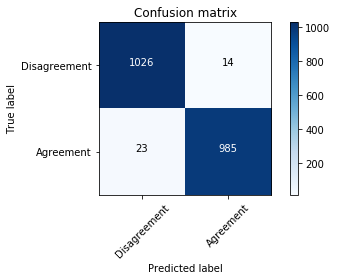

In [69]:
plot_cnf(clf_knn, X_test, y_test)